In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
word_embeddings = {
    "cat": [0.8,0.6],
    "kitten": [0.75,0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65,0.35],
    "car":[-0.5,0.2],
    "truck":[-0.45,0.15]
    }

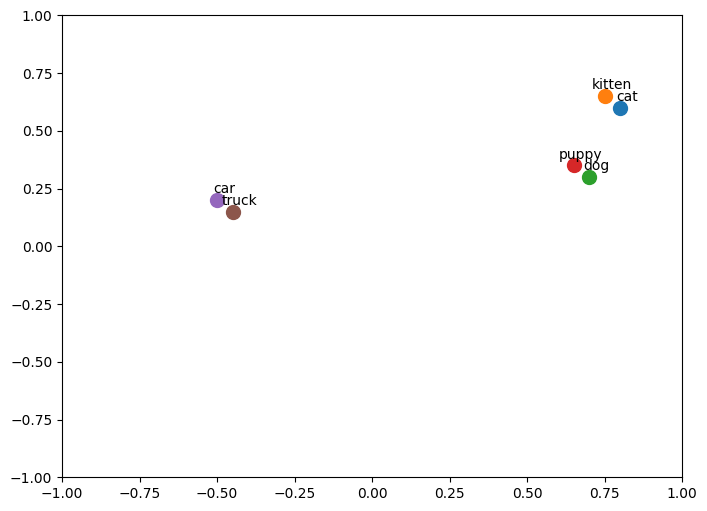

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
for word,coords in word_embeddings.items():
    ax.scatter(coords[0],coords[1],s= 100)
    ax.annotate(word,(coords[0],coords[1]), textcoords="offset points", xytext=(5,5), ha='center')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

Measuring Similarity>Cosine : Measure angle between two vector:-   A.B/ \|A||B|

1: very similar, -1 opposite meaning , 0 not related

In [11]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product / (norm_a * norm_b)

In [15]:
cat_vector = [0.8,0.6]
kitten_vector =[0.75,0.65]
dog_vector= [0.7, 0.3]
car_vector =[-0.5,0.2]


cat_kitten_similarity = cosine_similarity(cat_vector,kitten_vector)
cat_dog_similarity = cosine_similarity(cat_vector,dog_vector)
kitten_dog_similarity = cosine_similarity(kitten_vector,dog_vector)
car_cat_similarity = cosine_similarity(car_vector,cat_vector)

print(f"Cosine similarity between cat and kitten: {cat_kitten_similarity}")
print(f"Cosine similarity between cat and dog: {cat_dog_similarity}")
print(f"Cosine similarity between kitten and dog: {kitten_dog_similarity}")
print(f"Cosine similarity between car and cat: {car_cat_similarity}")


Cosine similarity between cat and kitten: 0.9975095892825593
Cosine similarity between cat and dog: 0.9716676031619468
Cosine similarity between kitten and dog: 0.9525776429967984
Cosine similarity between car and cat: -0.5199469468957453


## Create first embedding

In [19]:
from langchain_huggingface import HuggingFaceEmbeddings
#no api key needed for huggingface as this is opensource 
# 384 dimension dense vectore data base
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs={"device": "cpu"}
)
embeddings




c:\Users\abhisha3\Desktop\Projects\RAG Project\RAG_UDEMY\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={'device': 'cpu'}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [22]:
text = "Jello i am learning Gen Ai and RAG"

embedding = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding_length {len(embedding)}")
print(embedding)


Text: Jello i am learning Gen Ai and RAG
Embedding_length 384
[-0.07612349092960358, 0.01070957537740469, 0.022091953083872795, 0.0023535327054560184, -0.04552667960524559, -0.011881302110850811, 0.04757941886782646, 0.01219196431338787, -0.029704615473747253, -0.054039016366004944, -0.024164624512195587, -0.01269177719950676, 0.019710464403033257, -0.03185955435037613, -0.010238719172775745, -0.010239988565444946, 0.04603162035346031, 0.07892592996358871, -0.03438514843583107, -0.0977068692445755, -0.013996537774801254, 0.017676040530204773, 0.07421178370714188, -0.07310046255588531, -0.009591260924935341, 0.020891694352030754, 0.04588530212640762, 0.010309509001672268, 0.05925130844116211, -0.07616467773914337, 0.0273563414812088, 0.024900292977690697, 0.029912341386079788, -0.03508533537387848, -0.07627024501562119, 0.047306980937719345, -0.04834024980664253, -0.013567512854933739, 0.06970373541116714, -0.018962334841489792, 0.01996898092329502, 0.012918559834361076, -0.010359672829